In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

path = "babynames1880-2020.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(path)
df.show()

+----+---------+------+------+----+
|Year|     Name|Gender|Births|Rank|
+----+---------+------+------+----+
|2020|     Liam|     M| 19659|   1|
|2020|     Noah|     M| 18252|   2|
|2020|   Oliver|     M| 14147|   3|
|2020|   Elijah|     M| 13034|   4|
|2020|  William|     M| 12541|   5|
|2020|    James|     M| 12250|   6|
|2020| Benjamin|     M| 12136|   7|
|2020|    Lucas|     M| 11281|   8|
|2020|    Henry|     M| 10705|   9|
|2020|Alexander|     M| 10151|  10|
|2020|    Mason|     M| 10029|  11|
|2020|  Michael|     M|  9717|  12|
|2020|    Ethan|     M|  9464|  13|
|2020|   Daniel|     M|  9419|  14|
|2020|    Jacob|     M|  9196|  15|
|2020|    Logan|     M|  9086|  16|
|2020|  Jackson|     M|  9051|  17|
|2020|     Levi|     M|  9005|  18|
|2020|Sebastian|     M|  8927|  19|
|2020|    Mateo|     M|  8900|  20|
+----+---------+------+------+----+
only showing top 20 rows



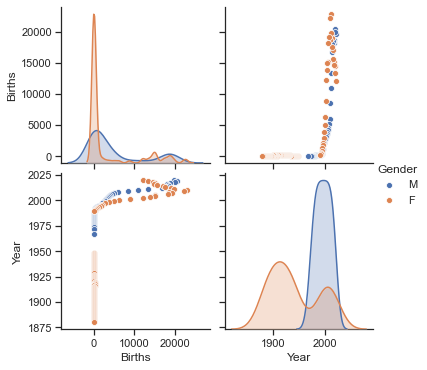

In [2]:
# Rikke
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

male = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Liam")
female = df.select("Births", "Name", "Year", "Gender").where(df.Name=="Isabella")

gender_df = male.union(female).toPandas()
pd.set_option("display.max_rows", None, "display.max_columns", None)

sns.set(style="ticks")
sns.pairplot(gender_df, hue="Gender")
plt.show()

In [5]:
# Richard

In [6]:
# Kristoffer

In [7]:
# Miriam

<class 'numpy.int32'>


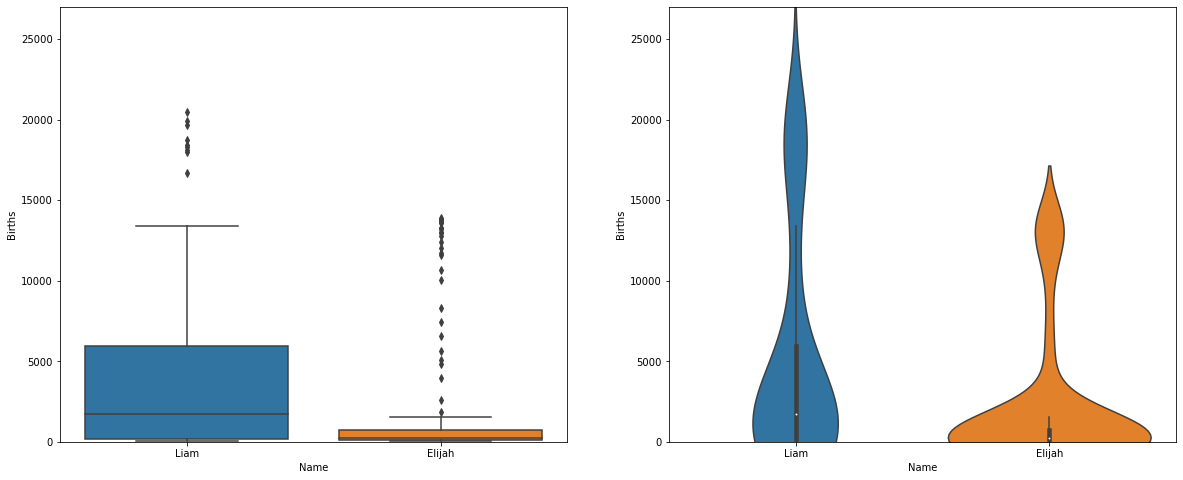

In [72]:
# Kasper
import seaborn as sns
import matplotlib.pyplot as plt

x1 = df.select("Births", "Name").where(df.Name=="Liam")
x2 = df.select("Births", "Name").where(df.Name=="Elijah")

births_df = x1.union(x2).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=births_df, x="Name", y="Births").set_ylim(0,27000)
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=births_df, x="Name", y="Births").set_ylim(0,27000)


In [ ]:
# Jeppe